# 3.5 Zbiór danych: ceny domów

In [1]:
import pandas as pd
import re

In [2]:
def read_boston_housing(filename):
    with open(filename, "r") as fp:
        lines = fp.readlines()[7:]
    header_lines = lines[0:14]
    headers = [line.strip().split(" ")[0] for line in header_lines]
    values = []
    entry_lines = lines[15:]
    for first, second in zip(entry_lines[::2],
                             entry_lines[1::2]):
        raw_entry = first.rstrip() + second.rstrip()
        raw_values = re.split("\s+", raw_entry.strip())
        values.append(list(map(float, raw_values)))
    return pd.DataFrame(values, columns=headers)


In [3]:
boston_df = read_boston_housing("../data/boston.txt")
boston_df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
374,18.49820,0.0,18.10,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
211,0.37578,0.0,10.59,1.0,0.489,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98,19.3
449,7.52601,0.0,18.10,0.0,0.713,6.417,98.3,2.1850,24.0,666.0,20.2,304.21,19.31,13.0
380,88.97620,0.0,18.10,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
425,15.86030,0.0,18.10,0.0,0.679,5.896,95.4,1.9096,24.0,666.0,20.2,7.68,24.39,8.3


Będziemy rozpatrywać problem określania wartości MEDV na podstawie pozostałych atrybutów. Innymi słowy, oszacujemy wartość domu w danym rejonie, na podstawie cech danego obszaru.

In [5]:
boston_df.corr().style.background_gradient("YlGn")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: xlabel='RM', ylabel='LSTAT'>

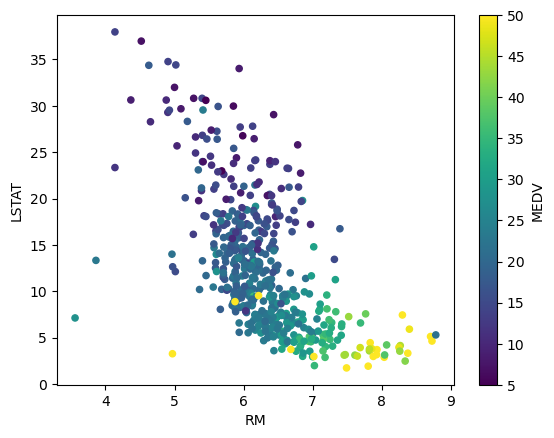

In [7]:
boston_df.plot.scatter(x="RM", y="LSTAT", c="MEDV")

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>],
       [<Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>],
       [<Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>],
       [<Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>]], dtype=object)

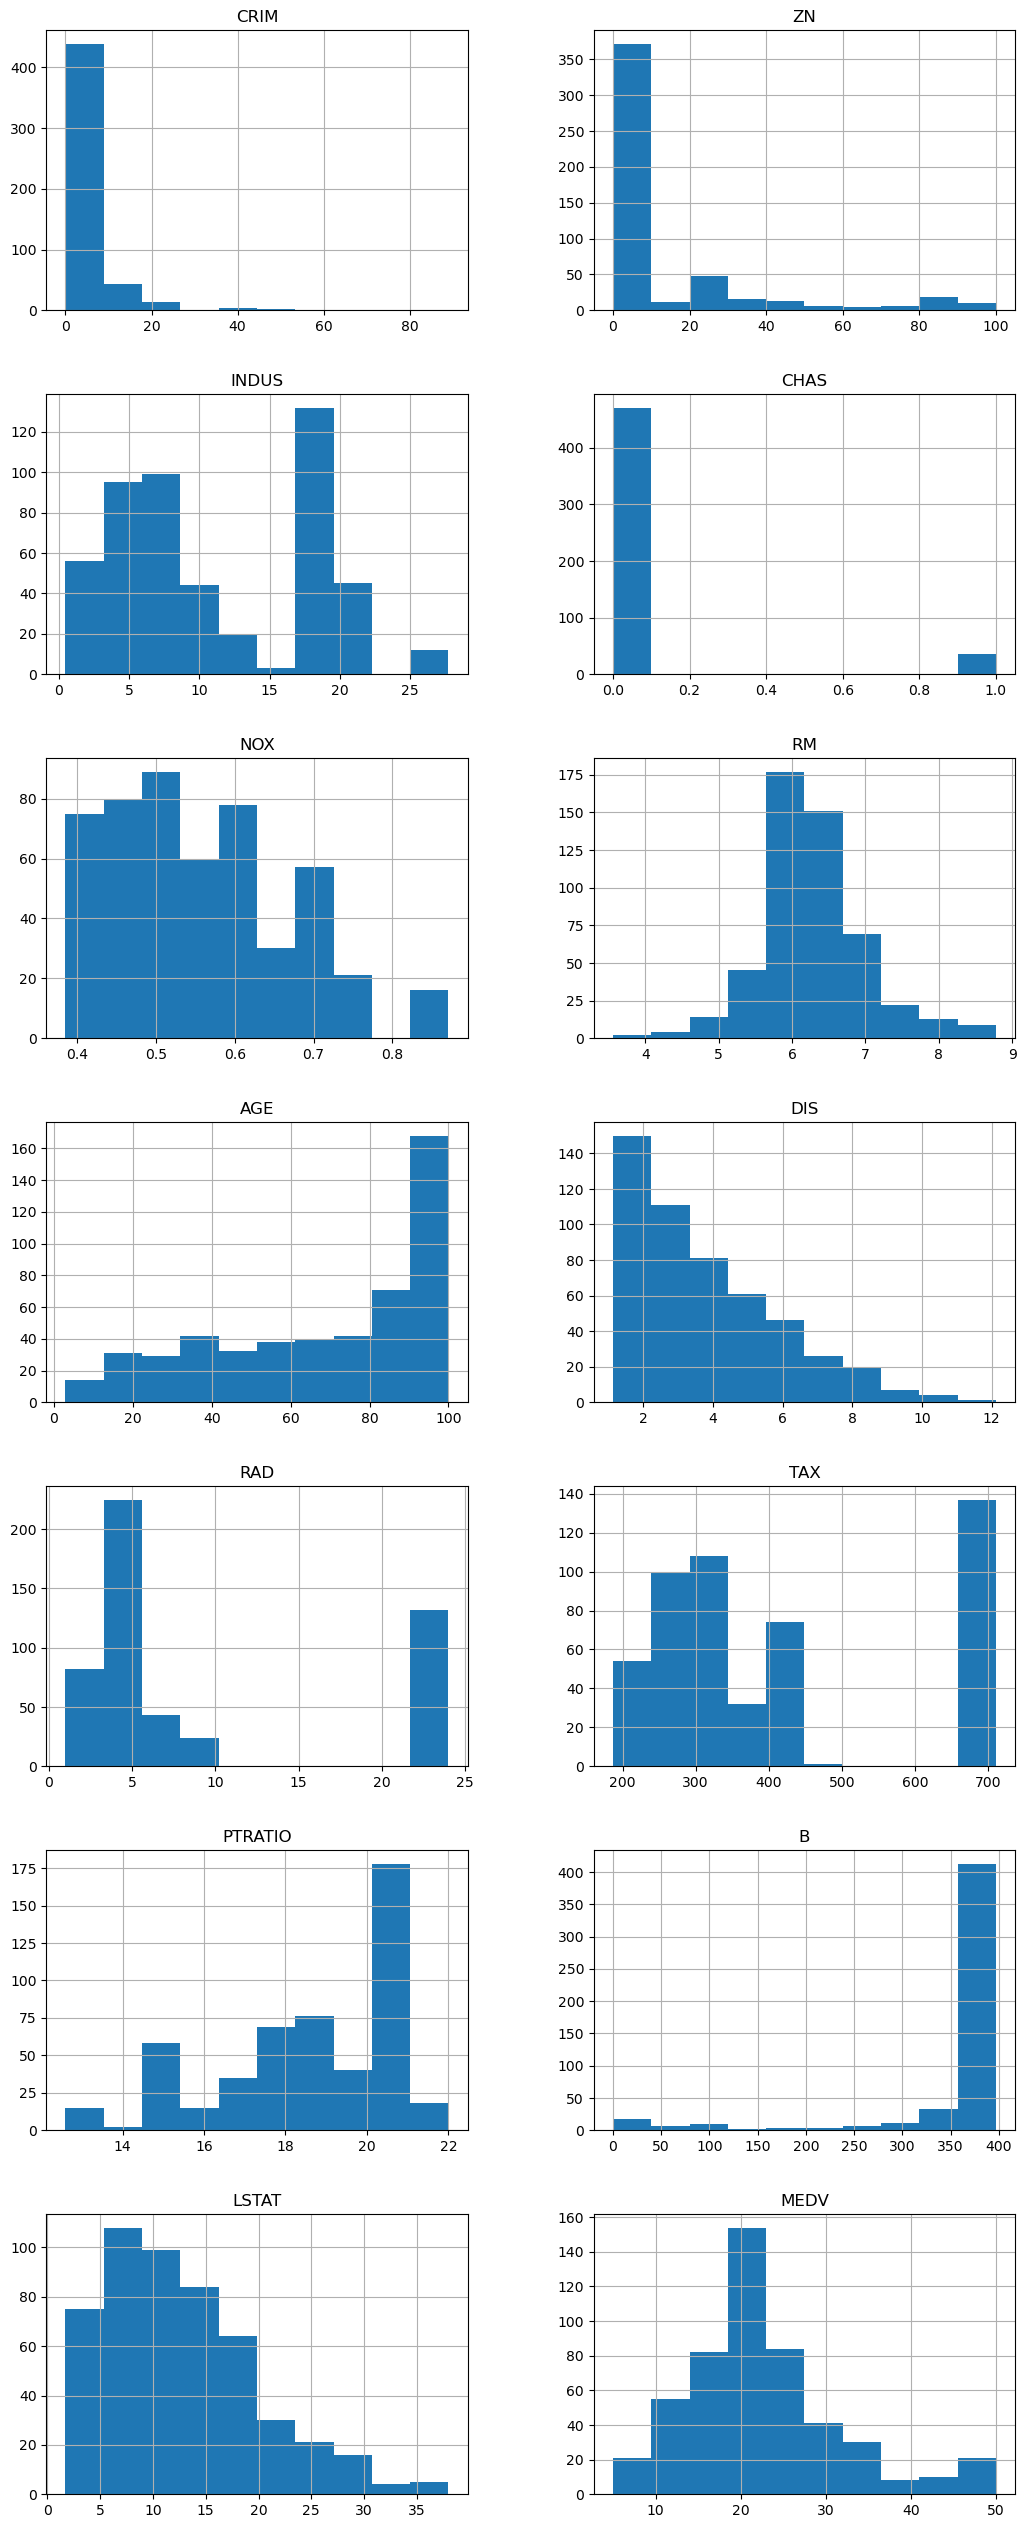

In [8]:
boston_df.hist(figsize=(12.5, 32.0), layout=(7, 2))

In [11]:
boston_df.sort_values(by="MEDV", ascending=False)["MEDV"].value_counts(sort=False)

MEDV
50.0    16
48.8     1
48.5     1
48.3     1
46.7     1
        ..
7.2      3
7.0      2
6.3      1
5.6      1
5.0      2
Name: count, Length: 229, dtype: int64

Zmienna *MEDV* zdaje się być sztucznie zaokrąglana do 50, ponieważ bardzo dużo obserwacji ma dokładnie taką samą wartość a w przedziale $ [40, 50) $ wartości są bardziej rozrzucone. Możemy interpretować ją jako wartość przekraczającą 50 tys. dolarów, jednak w oryginalnym zbiorze ciężko znaleźć jakąkolwiek informację na ten temat.

In [12]:
boston_df.to_parquet("../data/boston_df.parquet")